# The Normal distribution - Properties and warnings
## 1. Gauss and the 10 Deutschmark banknote:
What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote, shown to the right?

### Possible Answers:
* mean = 3, std = 1
* mean = 3, std = 2
* mean = 0.4, std = 1
* mean = 0.6, std = 6

<img src="../_datasets/Deutschmark_banknote_10.jpg" width="250">

Answer:
mean = 3, std = 1

## 2. Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. [Secretariat](https://en.wikipedia.org/wiki/Secretariat_(horse)) ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal()` function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).

### Instructions:
* Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array `belmont_no_outliers` has these data.
* Take 10,000 samples out of a normal distribution with this mean and standard deviation using `np.random.normal()`.
* Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to `x_theor, y_theor` and `x, y`, respectively.
* Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

In [1]:
# Import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

In [2]:
# Load dataframe
df = pd.read_csv('../_datasets/belmont.csv')

# Function to split time values from m:s.ms to s.ms
def mss_to_s(time_str):
    split_time = time_str.split(':')
    return int(split_time[0])*60 + float(split_time[1])

# Apply function mss_to_s to Time column in df
df['time_in_sec'] = df['Time'].apply(mss_to_s)
# Assign new time format data to belmont_winning_times
belmont_winning_times = df.time_in_sec.values
# Remove outliers from array located in year 1970 and 1973
belmont_no_outliers = df[df.Year.isin([1970, 1973]) == False].time_in_sec.values
# Assing outliers
belmont_secretariat = df[df.Year==1973].time_in_sec.values[0]
belmont_slow = df[df.Year==1970].time_in_sec.values[0]

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

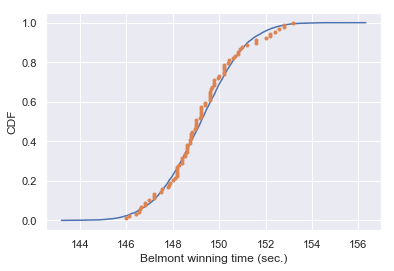

In [4]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

## 3. What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

### Instructions:
* Take 1,000,000 samples from the normal distribution using the `np.random.normal()` function. The mean `mu` and standard deviation `sigma` are already loaded into the namespace of your IPython instance.
* Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
* Print the result.

In [5]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000631


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.